# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric and our analysis? 

- Propose some new metrics that better represents the behavior of the stores' customers. Why are these metrics better? You can propose as many new metrics as you wish but quality heavily outweights quantity.

- Find the values of your new metrics.

- Report any other interesting findings.

Show all of your work in this notebook.

The average order value is not a proper metric in characterizing the typical order value taken place in the store - some of the transactions have a total items over 1000, which contributed to significant proportion of the total income of the store.

We have two strategies to solve this problem : 
* Adapt to a new metric : for example, the median of the total transaction *
* Constraint during data selection: only process the orders by individuals (# of items < 10) *

For this problem, I would go with the first option, as suggested by the instructions of this project.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("orders.csv")
df.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Text(0, 0.5, 'number of order in log')

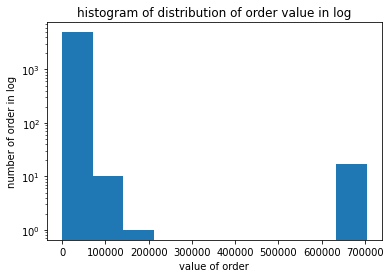

In [19]:
# We first take a look into the distribution of the total cost of these orders
plt.hist(df['order_value'], log=True)
plt.title ('histogram of distribution of order value in log')
plt.xlabel ('value of order')
plt.ylabel ('number of order in log')

We can see that even though most orders have relatively normal value, there are many orders where the values are extremely high because the number of sneakers they have brought.

In [20]:
print ("the median of the value of order is : ", df.order_value.median())

the median of the value of order is :  284.0


284 dollars! It is not too bad. It would be a much more reasonable price for a shoe store!

In [21]:
print ("Average price of one pair of shoes : ", (df.order_value / df.total_items).mean())

Average price of one pair of shoes :  387.7428


Wow! This is very expensive. Umich students are rich \thumbsup \thumbsup. But how about the median?

In [22]:
print ("Median price of one pair of shoes : ", (df.order_value / df.total_items).median())

Median price of one pair of shoes :  153.0


That makes much more sense. In fact, we can see from column 618 that someone had spent $51450 on two pair of shoes! that's insane! You can almost afford your tuition to attend Umich for an entire year with those pair of shoes!